In [73]:
import json
import pandas as pd

from datasets import load_dataset,get_dataset_split_names, get_dataset_config_names #hugging face datasets

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("pastel"))

import matplotlib.pyplot as plt


# Data preview

In [2]:
import requests
API_URL = "https://datasets-server.huggingface.co/first-rows?dataset=dbpedia_14&config=dbpedia_14&split=train"
def query():
    response = requests.request("GET", API_URL)
    return response.json()
data = query()


In [3]:
data.keys()

dict_keys(['dataset', 'config', 'split', 'features', 'rows'])

In [4]:
pd.DataFrame([line["row"] for line in data["rows"]])

label                              title  \
0       0                   E. D. Abbott Ltd   
1       0                     Schwan-Stabilo   
2       0                         Q-workshop   
3       0  Marvell Software Solutions Israel   
4       0        Bergan Mercy Medical Center   
..    ...                                ...   
95      0                              Aegon   
96      0  Parliamentary Monitoring Services   
97      0                       Rossiya Bank   
98      0                         Third Wire   
99      0                         Callcredit   

                                              content  
0    Abbott of Farnham E D Abbott Limited was a Br...  
1    Schwan-STABILO is a German maker of pens for ...  
2    Q-workshop is a Polish company located in Poz...  
3    Marvell Software Solutions Israel known as RA...  
4    Bergan Mercy Medical Center is a hospital loc...  
..                                                ...  
95   Aegon N.V. is a multinational life insurance ...  
96   Parliamentary Monitoring Services is a United...  
97   The Rossiya Bank (Bank Rossiya in Russian: Ак...  
98   Third Wire Productions Inc. (also known simpl...  
99   Callcredit Limited is a credit reference agen...  

[100 rows x 3 columns]

# Data downloading

In [5]:
get_dataset_split_names("dbpedia_14")

['train', 'test']

In [6]:
get_dataset_config_names("dbpedia_14")

['dbpedia_14']

In [7]:
data_train = load_dataset("dbpedia_14", split = "train")
data_test = load_dataset("dbpedia_14", split = "test")

Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)


In [8]:
data_train

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 560000
})

In [9]:
data_test

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 70000
})

In [10]:
# For some reason slicing loads faster the dataset (23s vs 1.9s)
df_train = pd.DataFrame(data_train[:560000])
df_train

label                              title  \
0           0                   E. D. Abbott Ltd   
1           0                     Schwan-Stabilo   
2           0                         Q-workshop   
3           0  Marvell Software Solutions Israel   
4           0        Bergan Mercy Medical Center   
...       ...                                ...   
559995     13                   Barking in Essex   
559996     13                   Science & Spirit   
559997     13             The Blithedale Romance   
559998     13                Razadarit Ayedawbon   
559999     13           The Vinyl Cafe Notebooks   

                                                  content  
0        Abbott of Farnham E D Abbott Limited was a Br...  
1        Schwan-STABILO is a German maker of pens for ...  
2        Q-workshop is a Polish company located in Poz...  
3        Marvell Software Solutions Israel known as RA...  
4        Bergan Mercy Medical Center is a hospital loc...  
...                                                   ...  
559995   Barking in Essex is a Black comedy play direc...  
559996   Science & Spirit is a discontinued American b...  
559997   The Blithedale Romance (1852) is Nathaniel Ha...  
559998   Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...  
559999   Vinyl Cafe Notebooks: a collection of essays ...  

[560000 rows x 3 columns]

In [11]:
# it has only 70000 rows, but for some reason slicing loads faster the dataset
df_test = pd.DataFrame(data_test[:70000])
df_test.head()

label                     title  \
0      0                     TY KU   
1      0     Odd Lot Entertainment   
2      0                    Henkel   
3      0                GOAT Store   
4      0  RagWing Aircraft Designs   

                                             content  
0   TY KU /taɪkuː/ is an American alcoholic bever...  
1   OddLot Entertainment founded in 2001 by longt...  
2   Henkel AG & Company KGaA operates worldwide w...  
3   The GOAT Store (Games Of All Type Store) LLC ...  
4   RagWing Aircraft Designs (also called the Rag...

### Labels distribution

The data is completely balanced, as shown in the plots

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


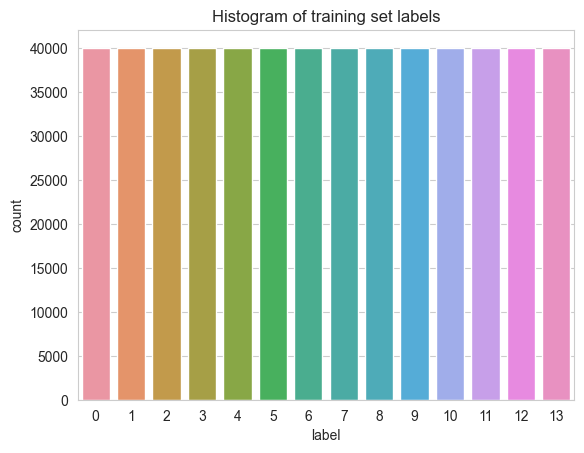

In [76]:
ax = sns.countplot(df_train["label"])
ax.set(title = "Histogram of training set labels")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


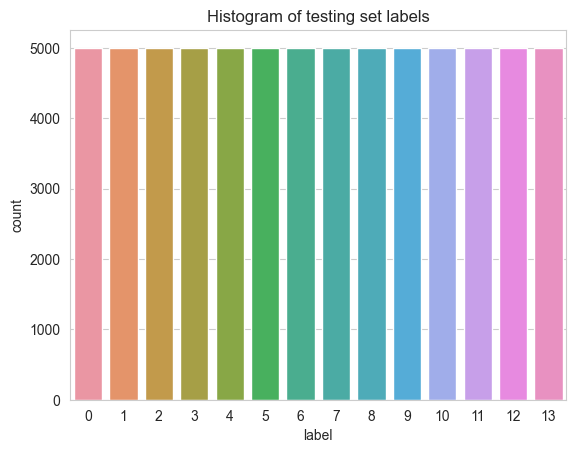

In [81]:
ax = sns.countplot(df_test["label"])
ax.set(title = "Histogram of testing set labels")
plt.show()

### Cleaning data:

We have some text with non-english characters

In [16]:
def isEnglish(s):
    try:
        s["content"].encode(encoding='utf-8').decode('ascii')
        s["title"].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        pass
    else:
        return s

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    560000 non-null  int64 
 1   title    560000 non-null  object
 2   content  560000 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.8+ MB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    70000 non-null  int64 
 1   title    70000 non-null  object
 2   content  70000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [37]:
df_train_with_na = df_train.apply(isEnglish, axis=1)
df_test_with_na = df_test.apply(isEnglish, axis=1)


In [75]:
examples_non_english_train = df_train[df_train_with_na.isna()].dropna(how="any")
examples_non_english_train.head()

label               title  \
2     0.0          Q-workshop   
10    0.0  Angstrem (company)   
12    0.0                 JVC   
13    0.0            Toei Bus   
18    0.0            CIB Bank   

                                              content  
2    Q-workshop is a Polish company located in Poz...  
10   Angstrem Group (Russian: ОАО «Ангстрем» named...  
12   Victor Company of Japan Ltd (日本ビクター株式会社 Nippo...  
13   The Toei Bus (都営バス Toei Basu) is a bus servic...  
18   CIB Bank is the second-biggest commercial ban...

In [36]:
examples_non_english_test = df_test[df_test_with_na.isna()].dropna(how="any")
examples_non_english_test.head()

label                title  \
0       0                TY KU   
2       0               Henkel   
5       0         Pošte Srpske   
13      0    Shell Oil Company   
22      0  Korchma Taras Bulba   

                                              content  
0    TY KU /taɪkuː/ is an American alcoholic bever...  
2    Henkel AG & Company KGaA operates worldwide w...  
5    Pošte Srpske is one of three companies respon...  
13   Shell Oil Company is the United States-based ...  
22   Korchma Taras Bulba – the chain of restaurant...

In [38]:
clean_df_train = df_train_with_na.dropna(how="any")
clean_df_train

label                              title  \
0         0.0                   E. D. Abbott Ltd   
1         0.0                     Schwan-Stabilo   
3         0.0  Marvell Software Solutions Israel   
4         0.0        Bergan Mercy Medical Center   
5         0.0                 The Unsigned Guide   
...       ...                                ...   
559994   13.0                Scoliosis (journal)   
559995   13.0                   Barking in Essex   
559996   13.0                   Science & Spirit   
559997   13.0             The Blithedale Romance   
559999   13.0           The Vinyl Cafe Notebooks   

                                                  content  
0        Abbott of Farnham E D Abbott Limited was a Br...  
1        Schwan-STABILO is a German maker of pens for ...  
3        Marvell Software Solutions Israel known as RA...  
4        Bergan Mercy Medical Center is a hospital loc...  
5        The Unsigned Guide is an online contacts dire...  
...                                                   ...  
559994   Scoliosis (ISSN 1748-7161) is an open-access ...  
559995   Barking in Essex is a Black comedy play direc...  
559996   Science & Spirit is a discontinued American b...  
559997   The Blithedale Romance (1852) is Nathaniel Ha...  
559999   Vinyl Cafe Notebooks: a collection of essays ...  

[385749 rows x 3 columns]

In [42]:
clean_df_test = df_test[~df_test_with_na.isna()]
clean_df_test.head()

label                      title  \
1          0      Odd Lot Entertainment   
3          0                 GOAT Store   
4          0   RagWing Aircraft Designs   
6          0           Open Kernel Labs   
7          0                  Skye Bank   
...      ...                        ...   
69992     13  Sometimes the Magic Works   
69993     13                Zia (novel)   
69994     13   Scottish Socialist Voice   
69995     13             Energy Victory   
69999     13       The Prophecy (novel)   

                                                 content  
1       OddLot Entertainment founded in 2001 by longt...  
3       The GOAT Store (Games Of All Type Store) LLC ...  
4       RagWing Aircraft Designs (also called the Rag...  
6       Open Kernel Labs (OK Labs) is a privately own...  
7       Skye Bank Plc. commonly known as Skye Bank is...  
...                                                  ...  
69992   Sometimes the Magic Works: Lessons from a Wri...  
69993   Zia is the sequel to the award-winning Island...  
69994   The Scottish Socialist Voice is a political n...  
69995   Energy Victory: Winning the War on Terror by ...  
69999   The Prophecy is the fifth novel by New York T...  

[48117 rows x 3 columns]

Deleting rows containing non-english characters has made the dataset unbalanced. This is something to take into account for future iterations. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


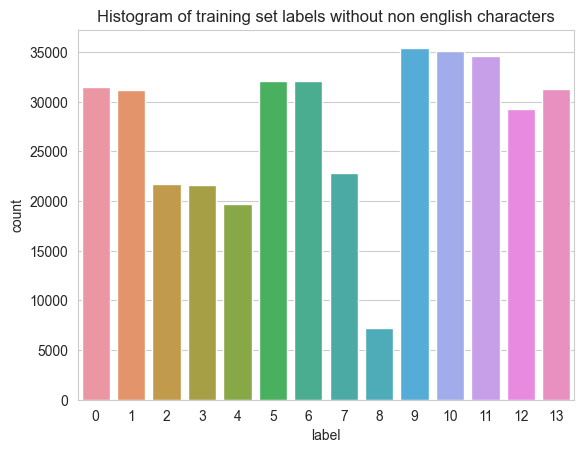

In [82]:
ax = sns.countplot(clean_df_train["label"].astype(int))
ax.set(title = "Histogram of training set labels without non english characters")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


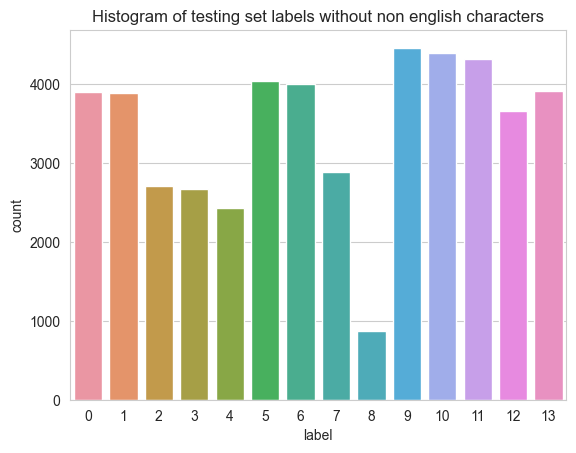

In [83]:
ax = sns.countplot(clean_df_test["label"])
ax.set(title = "Histogram of testing set labels without non english characters")
plt.show()

### Saving the data in reduced csv files

In [65]:
clean_df_train.to_csv('clean_df_train.csv', index=False)
clean_df_test.to_csv('clean_df_test.csv', index=False)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import all of the libraries
import pandas as pd
#! pip install --upgrade numpy
import numpy as np

#sklearn all
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

!pip install lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=bbdd55425de1ba97989264f35c92aad1a32c51d3a91cd1173997f18113f6c556
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [3]:
# load the data from the preprocessing stage
data_train = pd.read_csv('/content/gdrive/MyDrive/AdvancedNLP/clean_df_train.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/AdvancedNLP/clean_df_test.csv')

### Data Pre-Processing

In [4]:
X_train = data_train['content'].values
X_test = data_test['content'].values
y_train = data_train['label'].values
y_test = data_test['label'].values

The CountVectorizer is tokenising the data and puts it in a document term matrix.

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [6]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

### Model

In [7]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_predictions = clf.predict(X_test)
y_predictions[0:3]

array([0., 0., 0.])

In [9]:
class_names = ['Company', 'EducationalInstitution', 'Artist', 'Athlete', 'OfficeHolder',
              'MeanOfTransportation', 'Building', 'NaturalPlace', 'Village', 'Animal',
              'Plant', 'Album', 'Film','WrittenWork']

### Model Evaluation

Text(158.22222222222223, 0.5, 'Predicted')

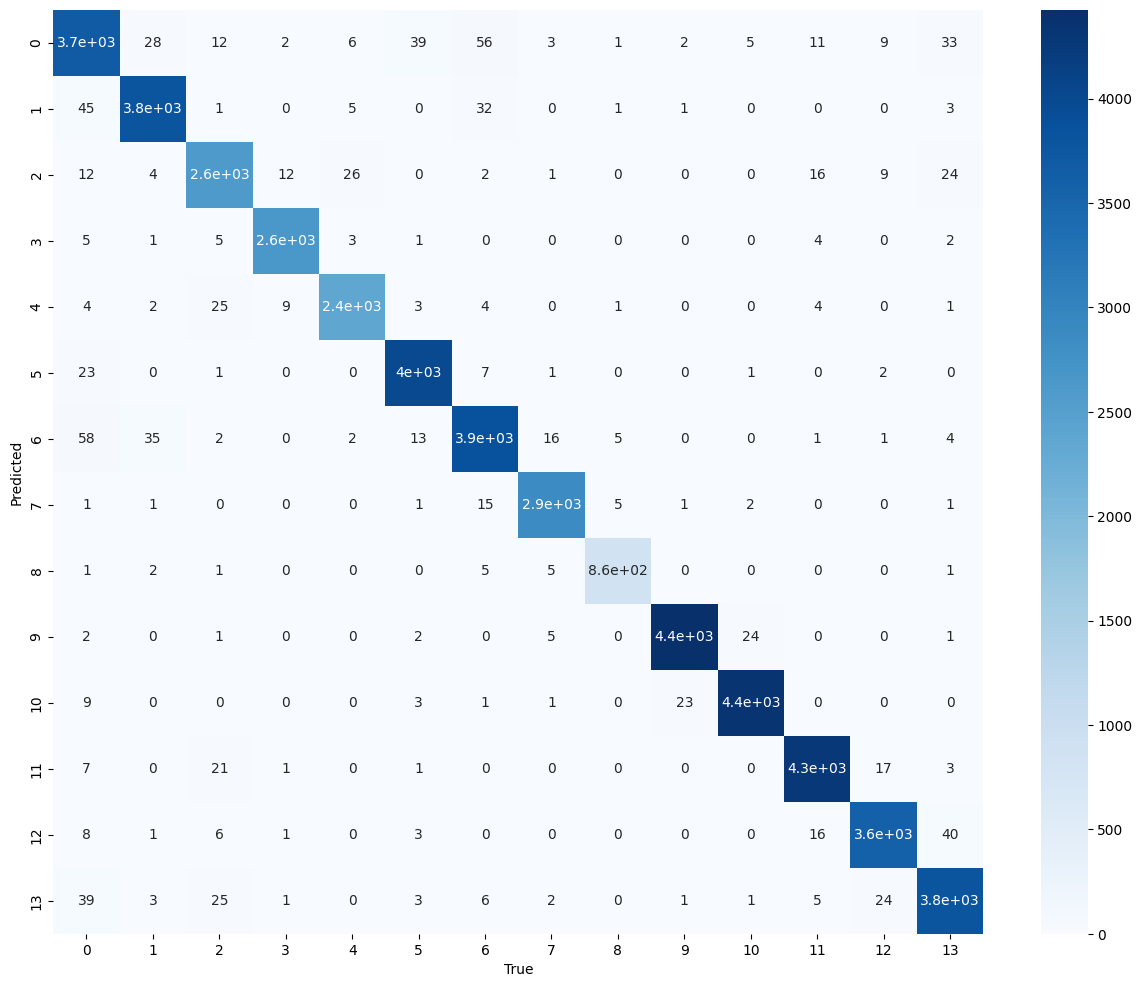

In [10]:
cm = confusion_matrix(y_test, y_predictions, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.figure(figsize=(15,12))
sns.heatmap(cm, cmap="Blues", annot = True)
plt.xlabel('True')
plt.ylabel('Predicted')

In [11]:
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_predictions)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_predictions, average='macro')))

Accuracy Score: 0.98
F1 Score: 0.98


the following chunks of code serve as a demonastration of how fast the models learn as a function of the amount of data.

In [12]:
steps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
clf2 = LogisticRegression()
vectorizer2 = CountVectorizer()

precisions = []
f1s = []

In [13]:
for i in steps:
  df = data_train.groupby('label').apply(lambda x: x.sample(frac=i)).reset_index(drop=True)
  y = df['label'].values
  X = df['content'].values
  X_te = data_test['content'].values
  y_te = data_test['label'].values
  vectorizer2.fit(X)
  X = vectorizer2.transform(X)
  X_te = vectorizer2.transform(X_te)
  clf2.fit(X, y)
  y_pred = clf2.predict(X_te)
  precisions.append(accuracy_score(y_te, y_pred))
  f1s.append(f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

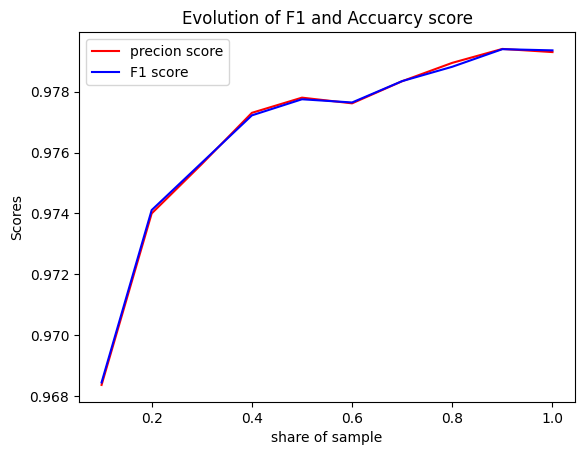

In [14]:
plt.plot(steps, precisions, 'r', label='precion score')
plt.plot(steps, f1s, 'b', label='F1 score')

# set the title and labels for the plot
plt.title('Evolution of F1 and Accuarcy score')
plt.xlabel('share of sample')
plt.ylabel('Scores')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

Using the Lime Text Explainer might help to understand how the model classifies the texts. However, it might not be scaleable.

In [15]:
c = make_pipeline(vectorizer, clf)

In [16]:
explainer = LimeTextExplainer(class_names=class_names)

exp = explainer.explain_instance(data_train['content'][315567], 
                                 classifier_fn=c.predict_proba,
                                 top_labels=3,
                                 num_features=10)

exp.show_in_notebook()

### Bias Detection
We now feed the model some words/sentences to see potetial biases.

In [17]:
# define sentitive works that I will then feed into lime
sentence1 = 'man boy european caucasian caribbean'
sentence2 = 'woman girl female bangladeshi gypsy'
sentence3 = 'He is balck pakistani european'
sentence4 = 'african indian asian arab'

In [18]:
bias1 = explainer.explain_instance(sentence1, 
                                 classifier_fn=c.predict_proba,
                                 top_labels=3,
                                 num_features=10)

bias1.show_in_notebook()

In [19]:
bias2 = explainer.explain_instance(sentence2, 
                                 classifier_fn=c.predict_proba,
                                 top_labels=3,
                                 num_features=10)

bias2.show_in_notebook()

In [20]:
bias3 = explainer.explain_instance(sentence3, 
                                 classifier_fn=c.predict_proba,
                                 top_labels=3,
                                 num_features=10)

bias3.show_in_notebook()

In [21]:
bias4 = explainer.explain_instance(sentence4, 
                                 classifier_fn=c.predict_proba,
                                 top_labels=3,
                                 num_features=10)

bias4.show_in_notebook()

In the instance bias3 we find a gender bias. Namely, the word he is assoiciated with Office Holders, Artists, and , which may suggest a gender bias. Next, we are investigating more thoroughly if the issue with male  

In [22]:
office = data_train[data_train['label']==4]
office.head(5)

label               title  \
105969    4.0        Jack Masters   
105970    4.0  Bhalchandra Yadava   
105971    4.0        T.W. Shannon   
105972    4.0         Jim Ananich   
105973    4.0          Jim Scheer   

                                                  content  
105969   John Gerald (Jack) Masters (born September 27...  
105970   Bhalchandra Yadava (born 1 July 1958) is an I...  
105971   Tahrohon Wayne Shannon (born February 24 1978...  
105972   James Ananich or Jim Ananich is a politician ...  
105973   Jim Scheer (born September 19 1953 in Norfolk...

In [23]:
office['FirstName'] = office['title'].str.split().str[0]
office.head(5)

<ipython-input-23-eeaf474e92ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['FirstName'] = office['title'].str.split().str[0]


label               title  \
105969    4.0        Jack Masters   
105970    4.0  Bhalchandra Yadava   
105971    4.0        T.W. Shannon   
105972    4.0         Jim Ananich   
105973    4.0          Jim Scheer   

                                                  content    FirstName  
105969   John Gerald (Jack) Masters (born September 27...         Jack  
105970   Bhalchandra Yadava (born 1 July 1958) is an I...  Bhalchandra  
105971   Tahrohon Wayne Shannon (born February 24 1978...         T.W.  
105972   James Ananich or Jim Ananich is a politician ...          Jim  
105973   Jim Scheer (born September 19 1953 in Norfolk...          Jim

To classify the office holders into male and female I use a data frame with genarl names and classification([Source](https://github.com/Jcharis/Python-Machine-Learning/tree/master/Gender%20Classification%20With%20%20Machine%20Learning)).

In [24]:
gender_names = pd.read_csv('/content/gdrive/MyDrive/AdvancedNLP/universalnames_dataset.csv')
gender_names.head(5)

Unnamed: 0   name sex
0           0  Abebe   M
1           1  Abebi   F
2           2   Abel   M
3           3  Abena   F
4           4  Abeni   F

In [25]:
gender_names = gender_names[(gender_names['sex']=='M') | (gender_names['sex']=='F')]
gender_names['sex'] = gender_names['sex'].apply(lambda x: 1 if x=='M' else 0)
print(gender_names['sex'].mean())
gender_names.head(5)

0.3653439920473843


<ipython-input-25-fe9b87c0d2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_names['sex'] = gender_names['sex'].apply(lambda x: 1 if x=='M' else 0)


Unnamed: 0   name  sex
0           0  Abebe    1
1           1  Abebi    0
2           2   Abel    1
3           3  Abena    0
4           4  Abeni    0

In [26]:
X_name = gender_names['name'].values
y_name = gender_names['sex'].values
X_name_test = office['FirstName'].values

In [27]:
from sklearn.naive_bayes import MultinomialNB
name = MultinomialNB()
cv = CountVectorizer()
cv.fit(X_name)
X_name = cv.transform(X_name)

In [28]:
name.fit(X_name, y_name)

MultinomialNB()

In [29]:
X_name_test = cv.transform(X_name_test)

sex_prediction = name.predict(X_name_test)
sex_prediction[0:5]

array([1, 0, 0, 1, 1])

In [30]:
office['sex'] = sex_prediction
office['sex'].mean()

<ipython-input-30-9edcce681d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['sex'] = sex_prediction


0.5477916941331575

The number of mean is slightly more than women in the data set. However, there is reason to believe that this number is underestimated. First the names data on which the Naive Bayesian Classifier is trained is skewed towards female names (~63%). Hence, some untradional names like T.W. Shannon are falsely classified as women. 

# Recurrent neural networks (RNN)

In [37]:
#spacy works for python 3.8.10
import spacy
#!python3.8 -m spacy download en_core_web_sm
import os
import ast

#word2vec
from gensim.models import Word2Vec
from gensim import downloader

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("pastel"))

#modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, Accuracy

import datetime

#saving model
import pickle

### Functions and global vars definition

In [2]:
DEVELOPING = False
MAX_LENGTH = 80
model_name = "RNN_model"

dest_path="data/models/RNN_outputs"
checkpoint_path_best = os.path.join(dest_path,model_name + "_best.hdf5")
checkpoint_path_last = os.path.join(dest_path,model_name + "_last.hdf5")
metrics_list = ["Accuracy", "Precision", "Recall"]

classes =["Company","EducationalInstitution","Artist",
          "Athlete","OfficeHolder","MeanOfTransportation",
          "Building","NaturalPlace","Village","Animal","Plant",
          "Album","Film","WrittenWork"]

In [3]:
nlp = spacy.load("en_core_web_sm")#english tokenizer, tagger, parser and NER
def split_sentences(text):
    aux_sentence = nlp(text)
    return [str(token.lemma_).lower() for token in aux_sentence if not (token.is_stop or \
                                                                token.is_punct or \
                                                                len(token)<3)]

def encoding_data(data_train,data_test,max_length):
    """This function creates the tokenizer, fits it to the data, tokenizes and padds train and test dataframes,
    saves the fitted tokenizer into a file, and finally returns train and test dataframes with text encoded as well as 
    the labels one hot encoded and the word_index dictionary"""
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data_train["preprocessed_content"])

    # word_index is a dictionary contains indeces for the words like {'for': 8, 'is': 9, 'me': 10, ...}
    word_index = tokenizer.word_index

    # train_sequences is vectors where each vector represents a sentence
    train_sequences = tokenizer.texts_to_sequences(data_train["preprocessed_content"])
    test_sequences = tokenizer.texts_to_sequences(data_test["preprocessed_content"])

    train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding="pre")
    test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding="pre")

    # Convert our labels into one-hot encoded
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoder.fit(np.array(data_train["label"]).reshape(-1, 1))

    train_labels = onehot_encoder.transform(np.array(data_train["label"]).reshape(-1, 1))
    test_labels = onehot_encoder.transform(np.array(data_test["label"]).reshape(-1, 1))


    # saving
    with open('data/tokenizers_embedders/tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


    return train_sequences, test_sequences, train_labels, test_labels, word_index

def embeddingWights(w2v, word_index, max_num_words=500000):
  
  all_embs = np.stack(w2v.wv.vectors)
  emb_mean,emb_std = all_embs.mean(), all_embs.std()

  num_words = min(max_num_words, len(word_index))+1

  embedding_dim=len(w2v.wv['software'])

  embedding_wights = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))

  for word, i in word_index.items():
    if i >= max_num_words:
        break

    if word in w2v.wv:
        embedding_vector = w2v.wv[word]
        embedding_wights[i] = embedding_vector
    
  return embedding_wights, num_words

def build_RNN_model(input_size, num_words, output_dim, embedding_wights,metrics_list):

    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=output_dim, trainable=True, input_length=input_size, weights=[embedding_wights]))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.2, dropout=0.2), 'concat'))
    model.add(Dropout(0.4))
    model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))
    model.add(Dropout(0.4))
    model.add(LSTM(32, return_sequences=False, recurrent_dropout=0.2, dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(14, activation='softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = "adam", metrics = metrics_list)


    return model


In [5]:
data_train = pd.read_csv("data/csv/clean_df_train.csv")
data_test = pd.read_csv("data/csv/clean_df_test.csv")

In [6]:
#subsampling for developing faster
if DEVELOPING:
    data_train = data_train.groupby('label').apply(lambda x: x.sample(frac=0.03)).reset_index(drop=True)
    data_test = data_test.groupby('label').apply(lambda x: x.sample(frac=0.03)).reset_index(drop=True)

## preprocessing

### Analyzing length of each sentence

With a length of input of 80 words we are only not completely getting approximatelly a 5% of the data (train and test)

In [7]:
data_train["words_count"] = data_train.apply(lambda row: len(row["content"].split()), axis = 1)
data_test["words_count"] = data_test.apply(lambda row: len(row["content"].split()), axis = 1)

In [8]:
data_train["words_count"].describe()

count    11573.000000
mean        45.155966
std         24.755010
min          2.000000
25%         24.000000
50%         44.000000
75%         65.000000
max       1175.000000
Name: words_count, dtype: float64

In [9]:
data_test["words_count"].describe()

count    1443.000000
mean       45.778933
std        23.077126
min         6.000000
25%        24.000000
50%        44.000000
75%        67.000000
max       179.000000
Name: words_count, dtype: float64

In [10]:
"""#parallelizing (Not sure it works correctly. Maybe mac hardware is not good for this)
import dask.dataframe as dd
from dask.multiprocessing import get

ddata = dd.from_pandas(data_train, npartitions=30)

#data_train[:1000].apply(lambda row: split_sentences(row["content"]), axis = 1)
ddata.map_partitions(lambda df: df.apply((lambda row: split_sentences(row["content"])), axis=1)).compute(scheduler="threads")"""

0        [ware, label, himeyasoft, inc., confuse, distr...
1        [octapharma, large, privately, own, human, pro...
2        [knoll, aircraft, company, american, aircraft,...
3        [middletown, area, transit, popularly, know, m...
4        [fabrap, finch, alexander, barnes, rothschild,...
                               ...                        
11568    [journal, gazette, morning, newspaper, fort, w...
11569    [scandia, academic, journal, history, publish,...
11570    [central, european, journal, mathematics, peer...
11571    [grey, japanese, science, fiction, manga, crea...
11572    [kindly, ones, french, les, bienveillantes, hi...
Length: 11573, dtype: object

In [11]:
data_train["preprocessed_content"] = data_train.apply(lambda row: split_sentences(row["content"]), axis = 1)
data_test["preprocessed_content"] = data_test.apply(lambda row: split_sentences(row["content"]), axis = 1)

In [12]:
data_train.head()

label                    title  \
0    0.0                 C's Ware   
1    0.0               Octapharma   
2    0.0   Knoll Aircraft Company   
3    0.0  Middletown Area Transit   
4    0.0                   FABRAP   

                                             content  words_count  \
0   C's Ware is a label of HimeyaSoft Inc. (not t...           77   
1   Octapharma AG is the largest privately owned ...           68   
2   Knoll Aircraft Company was an American aircra...           12   
3   Middletown Area Transit popularly known as MA...           73   
4   FABRAP or Finch Alexander Barnes Rothschild a...           32   

                                preprocessed_content  
0  [ware, label, himeyasoft, inc., confuse, distr...  
1  [octapharma, large, privately, own, human, pro...  
2  [knoll, aircraft, company, american, aircraft,...  
3  [middletown, area, transit, popularly, know, m...  
4  [fabrap, finch, alexander, barnes, rothschild,...

In [13]:
data_test.head()

label               title  \
0      0  SemBioSys Genetics   
1      0         Element Six   
2      0                NBTY   
3      0           Pinkberry   
4      0        Lam Research   

                                             content  words_count  \
0   SemBioSys Genetics Inc. was a development sta...           46   
1   Element Six (formerly De Beers Industrial Dia...           57   
2   NBTY Inc. formerly known as Nature's Bounty I...           56   
3   Pinkberry is a franchise of upscale frozen de...           65   
4   Lam Research Corporation is an American corpo...           27   

                                preprocessed_content  
0  [sembiosys, genetics, inc., development, stage...  
1  [element, beers, industrial, diamond, company,...  
2  [nbty, inc., know, nature, bounty, inc., ameri...  
3  [pinkberry, franchise, upscale, frozen, desser...  
4  [lam, research, corporation, american, corpora...

### Saving preprocessed dataframes to avoid repeating preprocessing

In [ ]:
data_train.to_csv('preprocessed_df_train.csv', index=False)
data_test.to_csv('preprocessed_df_test.csv', index=False)

## Tokenizer

In [4]:
data_train = pd.read_csv("data/csv/preprocessed_df_train.csv")
data_test = pd.read_csv("data/csv/preprocessed_df_test.csv")

In [20]:
data_train["preprocessed_content"] = data_train.apply(lambda row: ast.literal_eval(row["preprocessed_content"]), axis = 1)
data_test["preprocessed_content"] = data_test.apply(lambda row: ast.literal_eval(row["preprocessed_content"]), axis = 1)

In [21]:
train_sequences, test_sequences, train_labels, test_labels, word_index = encoding_data(data_train, data_test, MAX_LENGTH)

#Saving all information so we dont need to process them again
with open("data/tokenizers_embedders/train_sequences.pickle","wb") as file:
    pickle.dump(train_sequences,file)
with open("data/tokenizers_embedders/test_sequences.pickle","wb") as file:
    pickle.dump(test_sequences,file)
with open("data/tokenizers_embedders/train_labels.pickle","wb") as file:
    pickle.dump(train_labels,file)
with open("data/tokenizers_embedders/test_labels.pickle","wb") as file:
    pickle.dump(test_labels,file)
with open("data/tokenizers_embedders/word_index.pickle","wb") as file:
    pickle.dump(word_index,file)

In [22]:
# loading
with open('data/tokenizers_embedders/tokenizer.pickle', 'rb') as file:
    tokenizer = pickle.load(file)
with open("data/tokenizers_embedders/train_sequences.pickle","rb") as file:
    train_sequences = pickle.load(file)
with open("data/tokenizers_embedders/train_sequences.pickle","rb") as file:
    test_sequences = pickle.load(file)
with open("data/tokenizers_embedders/train_labels.pickle","rb") as file:
    train_labels = pickle.load(file)
with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)
with open("data/tokenizers_embedders/word_index.pickle","rb") as file:
    word_index = pickle.load(file)

# Defnining word embedding

### Creating our own word embedding with Word2vec

+ min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)
+ window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
+ size = int - Dimensionality of the feature vectors. - (50, 300)
+ sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
+ alpha = float - The initial learning rate - (0.01, 0.05)
min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
+ negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
+ workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [23]:
#total words in our vocabulary
len(word_index.keys())

416506

In [24]:
data_train

label                              title  \
0         0.0                   E. D. Abbott Ltd   
1         0.0                     Schwan-Stabilo   
2         0.0  Marvell Software Solutions Israel   
3         0.0        Bergan Mercy Medical Center   
4         0.0                 The Unsigned Guide   
...       ...                                ...   
385744   13.0                Scoliosis (journal)   
385745   13.0                   Barking in Essex   
385746   13.0                   Science & Spirit   
385747   13.0             The Blithedale Romance   
385748   13.0           The Vinyl Cafe Notebooks   

                                                  content  words_count  \
0        Abbott of Farnham E D Abbott Limited was a Br...           40   
1        Schwan-STABILO is a German maker of pens for ...           32   
2        Marvell Software Solutions Israel known as RA...           29   
3        Bergan Mercy Medical Center is a hospital loc...           19   
4        The Unsigned Guide is an online contacts dire...           37   
...                                                   ...          ...   
385744   Scoliosis (ISSN 1748-7161) is an open-access ...           60   
385745   Barking in Essex is a Black comedy play direc...           34   
385746   Science & Spirit is a discontinued American b...           66   
385747   The Blithedale Romance (1852) is Nathaniel Ha...           27   
385748   Vinyl Cafe Notebooks: a collection of essays ...           75   

                                     preprocessed_content  \
0       [abbott, farnham, abbott, limited, british, co...   
1       [schwan, stabilo, german, maker, pen, write, c...   
2       [marvell, software, solutions, israel, know, r...   
3       [bergan, mercy, medical, center, hospital, loc...   
4       [unsigned, guide, online, contact, directory, ...   
...                                                   ...   
385744  [scoliosis, issn, 1748, 7161, open, access, pe...   
385745  [bark, essex, black, comedy, play, direct, har...   
385746  [science, spirit, discontinued, american, bimo...   
385747  [blithedale, romance, 1852, nathaniel, hawthor...   
385748  [vinyl, cafe, notebooks, collection, essay, vi...   

                                            preprocessing  
0       [abbott, farnham, abbott, limited, british, co...  
1       [schwan, stabilo, german, maker, pen, write, c...  
2       [marvell, software, solutions, israel, know, r...  
3       [bergan, mercy, medical, center, hospital, loc...  
4       [unsigned, guide, online, contact, directory, ...  
...                                                   ...  
385744  [scoliosis, issn, 1748, 7161, open, access, pe...  
385745  [bark, essex, black, comedy, play, direct, har...  
385746  [science, spirit, discontinued, american, bimo...  
385747  [blithedale, romance, 1852, nathaniel, hawthor...  
385748  [vinyl, cafe, notebooks, collection, essay, vi...  

[385749 rows x 6 columns]

In [25]:
w2v_model = Word2Vec(sentences= data_train["preprocessed_content"].to_list(),
                     min_count=3,
                     window=10,
                     vector_size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007)

In [29]:
w2v_model.save("data/models/word2vec.model")

In [30]:
#total words in our word embedding ignoring words that appear less than 3 times
len(w2v_model.wv)

124152

In [32]:
embedding_wights, num_words = embeddingWights(w2v_model, word_index, max_num_words=500000)

In [33]:
# testing the word embedding by comparing the weights of the final 
# embedding_wights and w2v_model.wv vector for the word "software", 
# they should be the same so the result should be 0.

(embedding_wights[word_index["school"],:].reshape([100,1])-w2v_model.wv["school"].reshape([100,1])).sum()

0.0

In [35]:
#saving embedding weights
np.save('data/models/embedding_layer_weights.npy', embedding_wights)
np.save('data/models/num_words.npy', num_words)

### Visualizing word embedding

In [48]:
#loading previously trained model
w2v_model = Word2Vec.load("data/models/word2vec.model")

In [49]:
#testing similarities
word = 'software'
print(f"3 words similar to **{word}**")
words = w2v_model.wv.most_similar(word, topn=3)
for word in words:
  print(word)

3 words similar to **software**
('computer', 0.8293694257736206)
('linux', 0.8119499087333679)
('microsoft', 0.8118927478790283)


In [50]:
#testing similarities
word = 'school'
print(f"3 words similar to **{word}**")
words = w2v_model.wv.most_similar(word, topn=3)
for word in words:
  print(word)

3 words similar to **school**
('high', 0.7755335569381714)
('secondary', 0.7312402129173279)
('grade', 0.7299057841300964)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


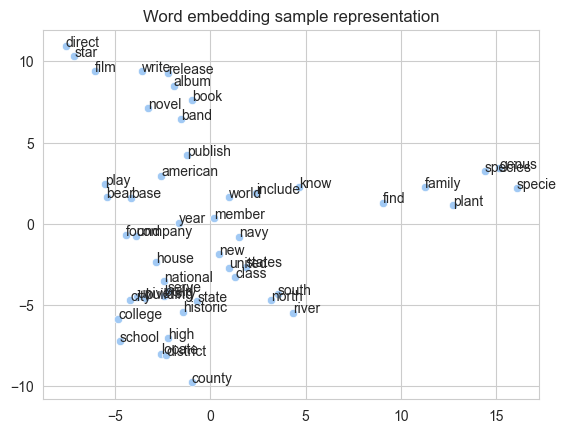

In [74]:
from sklearn.decomposition import PCA

words_to_represent = 50

pca = PCA(n_components=2)
result = pca.fit_transform(w2v_model.wv.vectors[:words_to_represent])
word_embedding_fig = sns.scatterplot(result[:,0],result[:,1])

words = list(w2v_model.wv.key_to_index.keys())[:words_to_represent]

for i in range(words_to_represent):
   word_embedding_fig.annotate(words[i], xy = (result[i, 0], result[i, 1]))

word_embedding_fig.set_title('Word embedding sample representation')

plt.savefig("data/results/figures/word_embedding.png")

# Training

### Data separation

In [68]:
#loading datasets
with open("data/tokenizers_embedders/train_sequences.pickle","rb") as file:
    train_sequences = pickle.load(file)
with open("data/tokenizers_embedders/test_sequences.pickle","rb") as file:
    test_sequences = pickle.load(file)
with open("data/tokenizers_embedders/train_labels.pickle","rb") as file:
    train_labels = pickle.load(file)
with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)

In [10]:
#loading files for training the model
embedding_wights = np.load("data/models/embedding_layer_weights.npy")
num_words = np.load("data/models/num_words.npy")

In [11]:
embedding_wights.shape

(416507, 100)

In [12]:
num_words

array(416507)

In [77]:
train_sequences.shape

(385749, 80)

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(train_sequences, 
                                                                  train_labels,
                                                                  test_size = 0.2)
test_data = test_sequences
test_labels = test_labels

In [15]:
#Creation of callbacks

log_dir = dest_path + "/logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                mode='min', 
                                                patience = 5, 
                                                verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,
                                                        histogram_freq = 1)

cp_callback_best = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_best,
                                                save_best_only=True,
                                                monitor = "val_loss",
                                                mode = "min",
                                                verbose=1)

cp_callback_last = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_last,
                                                    verbose = 0,
                                                    save_freq = 'epoch')

reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', patience = 5, mode = "min", verbose = 1, factor = 0.1, min_delta=0.001, min_lr = 0.00001)

callbacks_list = [cp_callback_best, cp_callback_last, es_callback, tensorboard_callback]

In [ ]:
#creating the model
RNN_model = build_RNN_model(MAX_LENGTH, num_words, 100, embedding_wights, metrics_list)
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 100)           41650700  
                                                                 
 batch_normalization (BatchN  (None, 80, 100)          400       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 80, 512)          731136    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 80, 512)           0         
                                                                 
 lstm_4 (LSTM)               (None, 80, 64)            147712    
                                                                 
 dropout_5 (Dropout)         (None, 80, 64)           

In [ ]:
history = RNN_model.fit(train_data, train_labels, epochs = 50,
          batch_size = 1512, shuffle=True,
          validation_data=[val_data, val_labels],
          callbacks = callbacks_list,
          verbose = 1,
          use_multiprocessing=True
          )

Epoch 1/50
205/205 [==============================] - ETA: 0s - loss: 1.1226 - Accuracy: 0.8502 - precision: 0.9701 - recall: 0.3303
Epoch 00001: val_loss improved from inf to 0.43931, saving model to data\models\tensorflow_outputs\RNN_model_best.hdf5
205/205 [==============================] - 1065s 5s/step - loss: 1.1226 - Accuracy: 0.8502 - precision: 0.9701 - recall: 0.3303 - val_loss: 0.4393 - val_Accuracy: 0.9598 - val_precision: 0.9699 - val_recall: 0.9334
Epoch 2/50
205/205 [==============================] - ETA: 0s - loss: 0.3893 - Accuracy: 0.9606 - precision: 0.9763 - recall: 0.8975
Epoch 00002: val_loss improved from 0.43931 to 0.18296, saving model to data\models\tensorflow_outputs\RNN_model_best.hdf5
205/205 [==============================] - 967s 5s/step - loss: 0.3893 - Accuracy: 0.9606 - precision: 0.9763 - recall: 0.8975 - val_loss: 0.1830 - val_Accuracy: 0.9753 - val_precision: 0.9798 - val_recall: 0.9717
Epoch 3/50
205/205 [==============================] - ETA: 0s -

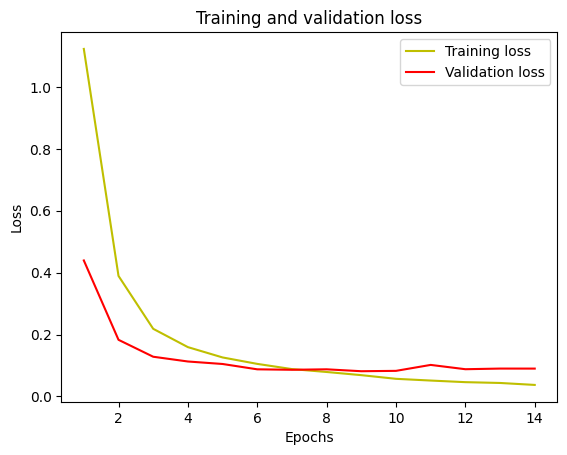

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Learning curve

In [4]:
data_train = pd.read_csv("data/csv/preprocessed_df_train.csv")


In [5]:
subsample_indices = list(map(lambda i: i[1] ,data_train.groupby('label').apply(lambda x: x.sample(n = int(14/14))).index))


In [19]:
#loading datasets
with open("data/tokenizers_embedders/train_sequences.pickle","rb") as file:
    train_sequences = pickle.load(file)
with open("data/tokenizers_embedders/test_sequences.pickle","rb") as file:
    test_sequences = pickle.load(file)
with open("data/tokenizers_embedders/train_labels.pickle","rb") as file:
    train_lab = pickle.load(file)
with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)

#loading embedding
embedding_wights = np.load("data/models/embedding_layer_weights.npy")
num_words = np.load("data/models/num_words.npy")


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ns = [56,560,5600,10000]
samples = 2
epochs = 2


precision_means = []
recall_means = []
precision_std = []
recall_std = []

accuracy_means = []
F1_means = []
accuracy_std = []
F1_std = []

for n in ns:
      accuracies = []
      precisions = []
      recalls = []
      F1scores = []
      for i in range(samples):
         RNN_model = build_RNN_model(MAX_LENGTH, num_words, 100, embedding_wights, metrics_list)

         subsample_indices = list(map(lambda i: i[1] ,data_train.groupby('label').apply(lambda x: x.sample(int(n/14))).index))
         train_data, val_data, train_labels, val_labels = train_test_split(train_sequences[subsample_indices], 
                                                                  train_lab[subsample_indices],
                                                                  test_size = 0.2,
                                                                  random_state=10)
         if n < 1000:
            batch_size = 12
         else:
            batch_size = 864
         RNN_model.fit(train_data,train_labels , epochs = epochs,
                  batch_size = batch_size, shuffle=True,
                  validation_data=[val_data, val_labels],
                  verbose = 1,
                  use_multiprocessing=True
                  )
         
         preds = RNN_model.predict(test_sequences, batch_size = 800)

         accuracy = accuracy_score(np.argmax(test_labels, axis = 1), np.argmax(preds, axis = 1))
         precision = precision_score(np.argmax(test_labels, axis = 1), np.argmax(preds, axis = 1), average="micro")
         recall = recall_score(np.argmax(test_labels, axis = 1), np.argmax(preds, axis = 1), average="micro")
         f1score = f1_score(np.argmax(test_labels, axis = 1), np.argmax(preds, axis = 1), average="micro")

         accuracies.append(accuracy)
         precisions.append(precision)
         recalls.append(accuracy)
         F1scores.append(2*(precision*recall)/(precision+recall+0.00001))

          
      precision_means.append(np.mean(precisions))
      recall_means.append(np.mean(recalls))
      precision_std.append(np.std(precisions))
      recall_std.append(np.std(recalls))
      accuracy_means.append(np.mean(precisions))
      F1_means.append(np.mean(recalls))
      accuracy_std.append(np.mean(precisions))
      F1_std.append(np.mean(recalls))


Epoch 1/2
4/4 [==============================] - 42s 3s/step - loss: 2.7669 - Accuracy: 0.0909 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.8819 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
61/61 [==============================] - 120s 2s/step
Epoch 1/2
4/4 [==============================] - 32s 3s/step - loss: 2.9406 - Accuracy: 0.0682 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.9557 - val_Accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
61/61 [==============================] - 90s 1s/step
Epoch 1/2
38/38 [==============================] - 70s 1s/step - loss: 2.6743 - Accuracy: 0.1183 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.4178 - val_Accuracy: 0.2946 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
61/61 [==============================] - 69s 1s/step
Epoch 1/2
38/38 [==============================] - 46s 928ms/step - loss: 2.6781 - Accuracy: 0.

In [61]:
precision_means

[0.08358792110896357,
 0.5524242991042667,
 0.18126649624872704,
 0.6063969075378763]

### Evaluation

In [7]:
with open("data/tokenizers_embedders/test_sequences.pickle","rb") as file:
    test_sequences = pickle.load(file)
with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)

with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)

#loading embedding
embedding_wights = np.load("data/models/embedding_layer_weights.npy")
num_words = np.load("data/models/num_words.npy")

#creating the model structure
RNN_model = build_RNN_model(MAX_LENGTH, num_words, 100, embedding_wights, metrics_list)

#loading weights
checkpoint_path = checkpoint_path_best
RNN_model.load_weights(checkpoint_path)

In [8]:
results = RNN_model.evaluate(test_sequences, test_labels, batch_size = 1512)
results

32/32 [==============================] - 86s 3s/step - loss: 0.0821 - Accuracy: 0.9839 - precision: 0.9854 - recall: 0.9831


[0.08208899199962616,
 0.9839349985122681,
 0.9853559732437134,
 0.9830828905105591]

In [9]:
F1score = 2*(results[2]*results[3])/(results[2]+results[3])
F1score

0.9842181194398524

In [10]:
print("Precision over test set: " + str(results[2]))
print("Recall over test set: " + str(results[3]))
print("Accuracy over test set: " + str(results[1]))
print("F1 over test set: " + str(F1score))

Precision over test set: 0.9853559732437134
Recall over test set: 0.9830828905105591
Accuracy over test set: 0.9839349985122681
F1 over test set: 0.9842181194398524


In [11]:
#creating a matrix with results for each class
test_labels.shape

(48117, 14)

In [12]:
results_matrix = np.zeros((4,14))

In [13]:
for i in range(14):
    y_test_class = test_labels[test_labels[:,i] == 1]
    x_test_class = test_sequences[test_labels[:,i] == 1]
    results = RNN_model.evaluate(x_test_class, y_test_class, batch_size = 1512)

    results_matrix[0,i] = results[1]#accuracy
    results_matrix[1,i] = results[2]#precision
    results_matrix[2,i] = results[3]#recall
    results_matrix[3,i] = 2*(results[2]*results[3])/(results[2]+results[3])#F1    

3/3 [==============================] - 6s 2s/step - loss: 0.0935 - Accuracy: 0.9816 - precision: 0.9838 - recall: 0.9811


In [16]:
results_matrix

array([[0.95976424, 0.98171043, 0.97338265, 0.99212891, 0.98146623,
        0.98737311, 0.97726703, 0.9913255 , 0.9908362 , 0.99080926,
        0.99681091, 0.98981953, 0.98330599, 0.98157626],
       [0.96186548, 0.98397934, 0.97553742, 0.99324578, 0.98388427,
        0.98834902, 0.97843528, 0.99201387, 0.99197251, 0.99125367,
        0.9970367 , 0.99118537, 0.98518109, 0.98383373],
       [0.95668888, 0.98093766, 0.97301292, 0.99212891, 0.9806425 ,
        0.98712552, 0.97476894, 0.9913255 , 0.9908362 , 0.99080926,
        0.99635535, 0.98866266, 0.98248494, 0.9810645 ],
       [0.9592702 , 0.98245615, 0.97427354, 0.99268703, 0.98226071,
        0.98773689, 0.97659867, 0.99166957, 0.99140403, 0.99103142,
        0.99669591, 0.98992241, 0.98383117, 0.98244716]])

In [15]:
results_matrix.shape

(4, 14)

In [74]:
results_df = pd.DataFrame(results_matrix, columns = classes)
results_df.index = ["Accuracy", "Precision", "Recall", "F1score"]
results_df["global"] = results_df.apply(lambda row: row[classes].mean(), axis = 1)
results_df

Company  EducationalInstitution    Artist   Athlete  OfficeHolder  \
Accuracy   0.959764                0.981710  0.973383  0.992129      0.981466   
Precision  0.961865                0.983979  0.975537  0.993246      0.983884   
Recall     0.956689                0.980938  0.973013  0.992129      0.980642   
F1score    0.959270                0.982456  0.974274  0.992687      0.982261   

           MeanOfTransportation  Building  NaturalPlace   Village    Animal  \
Accuracy               0.987373  0.977267      0.991325  0.990836  0.990809   
Precision              0.988349  0.978435      0.992014  0.991973  0.991254   
Recall                 0.987126  0.974769      0.991325  0.990836  0.990809   
F1score                0.987737  0.976599      0.991670  0.991404  0.991031   

              Plant     Album      Film  WrittenWork    global  
Accuracy   0.996811  0.989820  0.983306     0.981576  0.984113  
Precision  0.997037  0.991185  0.985181     0.983834  0.985555  
Recall     0.996355  0.988663  0.982485     0.981064  0.983346  
F1score    0.996696  0.989922  0.983831     0.982447  0.984449

In [47]:
results_df.to_csv("data/models_results/RNN_metrics_results.csv")

# Error analysis

In [87]:
#loading datasets
with open("data/tokenizers_embedders/test_sequences.pickle","rb") as file:
    test_sequences = pickle.load(file)
with open("data/tokenizers_embedders/test_labels.pickle","rb") as file:
    test_labels = pickle.load(file)

#loading embedding
embedding_wights = np.load("data/models/embedding_layer_weights.npy")
num_words = np.load("data/models/num_words.npy")

#creating the model structure
RNN_model = build_RNN_model(MAX_LENGTH, num_words, 100, embedding_wights, metrics_list)

#loading weights
checkpoint_path = checkpoint_path_best
RNN_model.load_weights(checkpoint_path)

In [88]:
test_dataset_errors = pd.read_csv("data/csv/preprocessed_df_test.csv")

In [90]:
test_pred = RNN_model.predict(test_sequences, batch_size = 1024)

47/47 [==============================] - 72s 2s/step


In [93]:
max_vals = []
for vector in test_pred:

    max_val = np.max(vector)
    max_index = np.where(vector == max_val)[0][0]
    max_vals.append(max_index)
    
test_dataset_errors["pred"] = max_vals

In [106]:
test_dataset_errors["correct_pred"] = test_dataset_errors.apply(lambda row: True if row["pred"]==row["label"] else False, axis = 1)

In [111]:
test_dataset_errors.to_csv("data/results/models_results/RNN_errors_analysis.csv")

In [108]:
test_dataset_errors[test_dataset_errors["correct_pred"] == False]["label"].value_counts()

0     157
6      91
2      72
13     72
1      71
12     61
5      51
4      45
11     44
9      41
7      25
3      21
10     14
8       8
Name: label, dtype: int64

# Bias analysis

In [20]:
#loading embedding
embedding_wights = np.load("data/models/embedding_layer_weights.npy")
num_words = np.load("data/models/num_words.npy")

#creating the model structure
RNN_model = build_RNN_model(MAX_LENGTH, num_words, 100, embedding_wights, metrics_list)

#loading weights
checkpoint_path = checkpoint_path_best
RNN_model.load_weights(checkpoint_path)

# loading tokenizer
with open('data/tokenizers_embedders/tokenizer.pickle', 'rb') as file:
    tokenizer = pickle.load(file)

In [10]:
#loading word embedder
w2v_model = Word2Vec.load("data/models/word2vec.model")

In [75]:
words = ["man","boy","male","woman","girl","female",
          "european","caucasian","african","asian" ,
          "indian","pakistani","bangladeshi","chinese",
          "caribbean","gypsy","arab"]

token_seq = []


for word in words:
    token = w2v_model.wv.key_to_index[word]
    token_seq.append([token])
    padded_sequences = pad_sequences(token_seq, maxlen=MAX_LENGTH, padding="pre")

padded_sequences

array([[   0,    0,    0, ...,    0,    0,  243],
       [   0,    0,    0, ...,    0,    0,  552],
       [   0,    0,    0, ...,    0,    0, 1007],
       ...,
       [   0,    0,    0, ...,    0,    0, 1808],
       [   0,    0,    0, ...,    0,    0, 8733],
       [   0,    0,    0, ...,    0,    0, 2418]], dtype=int32)

In [76]:
bias_results = RNN_model.predict(padded_sequences)

1/1 [==============================] - 1s 1s/step


In [80]:
bias_results = pd.DataFrame(bias_results, columns=classes)
bias_results.index = words
bias_results

Company  EducationalInstitution    Artist   Athlete  \
man          0.185187                0.064930  0.045896  0.051979   
boy          0.000746                0.003273  0.000709  0.012014   
male         0.145366                0.085077  0.046972  0.039603   
woman        0.131825                0.025133  0.039009  0.094813   
girl         0.027889                0.015640  0.010343  0.001158   
female       0.084327                0.196300  0.037152  0.144879   
european     0.113899                0.018514  0.064077  0.106935   
caucasian    0.105238                0.029547  0.035476  0.080670   
african      0.044473                0.026737  0.012612  0.040498   
asian        0.186272                0.025032  0.032311  0.042173   
indian       0.030055                0.012550  0.009109  0.787852   
pakistani    0.143007                0.009002  0.001866  0.021602   
bangladeshi  0.080176                0.018889  0.115252  0.102205   
chinese      0.073870                0.028125  0.073462  0.063771   
caribbean    0.107053                0.042237  0.024851  0.055018   
gypsy        0.075176                0.014159  0.113200  0.092343   
arab         0.090494                0.050692  0.093192  0.069542   

             OfficeHolder  MeanOfTransportation  Building  NaturalPlace  \
man              0.058277              0.031698  0.077652      0.004840   
boy              0.001758              0.000905  0.001762      0.000071   
male             0.075645              0.050949  0.087699      0.061754   
woman            0.198807              0.059704  0.053253      0.018026   
girl             0.044820              0.033690  0.720597      0.026533   
female           0.063758              0.041069  0.060617      0.004719   
european         0.277660              0.050301  0.051948      0.018267   
caucasian        0.187822              0.046349  0.063021      0.016218   
african          0.091780              0.018946  0.026748      0.017999   
asian            0.132493              0.039383  0.058524      0.086859   
indian           0.015461              0.012803  0.001095      0.000544   
pakistani        0.028362              0.018854  0.016358      0.008088   
bangladeshi      0.357812              0.046861  0.061500      0.014195   
chinese          0.298630              0.061524  0.099014      0.017117   
caribbean        0.103349              0.038235  0.055787      0.034267   
gypsy            0.410478              0.041612  0.053708      0.017413   
arab             0.154590              0.059386  0.097164      0.011957   

              Village    Animal     Plant     Album      Film  WrittenWork  
man          0.038555  0.021730  0.009871  0.073602  0.254367     0.081415  
boy          0.001058  0.964592  0.006997  0.004078  0.001851     0.000185  
male         0.134053  0.032464  0.060315  0.092336  0.048591     0.039175  
woman        0.055779  0.039579  0.054535  0.133210  0.063404     0.032923  
girl         0.020421  0.024470  0.032099  0.017220  0.011974     0.013145  
female       0.077267  0.092173  0.034930  0.054721  0.073297     0.034791  
european     0.040633  0.034221  0.056346  0.088227  0.046717     0.032254  
caucasian    0.080434  0.044574  0.051669  0.156524  0.065465     0.036995  
african      0.372020  0.014004  0.043554  0.217669  0.045314     0.027646  
asian        0.066474  0.027110  0.068450  0.174089  0.032838     0.027992  
indian       0.005398  0.033414  0.031776  0.037807  0.007999     0.014138  
pakistani    0.023376  0.019463  0.016973  0.637717  0.021467     0.033865  
bangladeshi  0.030386  0.032310  0.043456  0.038122  0.034087     0.024748  
chinese      0.072705  0.033481  0.056292  0.049299  0.044454     0.028255  
caribbean    0.130135  0.045096  0.063787  0.216967  0.047603     0.035614  
gypsy        0.027377  0.026845  0.051601  0.030790  0.025133     0.020164  
arab         0.072935  0.030509  0.055200  0.051007  0.043222     0.120110

In [84]:
bias_results.to_csv("data/results/models_results/RNN_biass_analysis.csv")


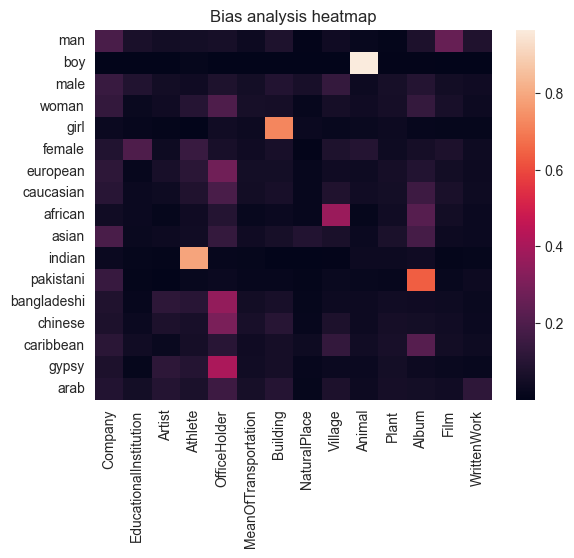

In [86]:
sns.heatmap(bias_results)
plt.title('Bias analysis heatmap')
plt.savefig("data/results/figures/biass_heatmap.png")

In [ ]:
from google.colab import files
files = files.upload()

Saving clean_df_test.csv to clean_df_test.csv
Saving clean_df_train.csv to clean_df_train.csv
Saving tokenizer.pickle to tokenizer.pickle


In [ ]:
import sys
from sklearn.model_selection import train_test_split
import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import numpy as np 


print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-5.10.147+-x86_64-with-glibc2.31
Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas 1.4.4
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [ ]:
DEVELOPING = True
MAX_LENGTH = 80

In [ ]:
data_train = pd.read_csv("clean_df_train.csv")
data_test = pd.read_csv("clean_df_test.csv")

In [ ]:
#subsampling for developing faster
if DEVELOPING:
    data_train = data_train.groupby('label').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)

In [ ]:
data_train["words_count"] = data_train.apply(lambda row: len(row["content"].split()), axis = 1)
data_test["words_count"] = data_test.apply(lambda row: len(row["content"].split()), axis = 1)

In [ ]:
data_train[data_train["words_count"] > 80]

label                      title  \
67       0.0                Vienna Beef   
132      0.0           West (publisher)   
143      0.0                  Skygoblin   
184      0.0              Annalee Dolls   
232      0.0     Teenage USA Recordings   
...      ...                        ...   
38429   13.0              America Again   
38453   13.0                  Dumb Dora   
38525   13.0  The Last King of Scotland   
38550   13.0    Green Bay Press-Gazette   
38554   13.0      Spirit Walker (novel)   

                                                 content  words_count  
67      Vienna Beef is a manufacturer of the hot dog ...           81  
132     West (also known by its original name West Pu...           81  
143     Skygoblin is a video game developer based in ...           83  
184     Annalee Dolls Inc. also known as Annalee Mobi...           81  
232     Teenage USA Recordings is a Canadian independ...          102  
...                                                  ...          ...  
38429   America Again: Re-becoming The Greatness We N...           83  
38453   A dumb Dora is 1920s American slang for a foo...           84  
38525   The Last King of Scotland is an award-winning...           86  
38550   The Green Bay Press-Gazette is a newspaper wh...           83  
38554   Spirit Walker is the second book in the serie...           82  

[1707 rows x 4 columns]

In [ ]:
data_test[data_test["words_count"] > 80]

label                                            title  \
74         0              Haudenosaunee Development Institute   
86         0                                       Transurban   
93         0            American Society of Plant Taxonomists   
105        0                      Town & Country Surf Designs   
116        0                             New Media Strategies   
...      ...                                              ...   
48059     13    Rubicon: The Last Years of the Roman Republic   
48085     13  The Simpsons and Philosophy: The D'oh! of Homer   
48093     13                               The Saint in Miami   
48094     13           The Last Voyage of Somebody the Sailor   
48107     13                                 Packing for Mars   

                                                 content  words_count  
74      Haudenosaunee Development Institute is the fo...          124  
86      Transurban manages and develops urban toll ro...           83  
93      The American Society of Plant Taxonomists (AS...           84  
105     Town & Country Surf Designs (also known as T&...           81  
116     New Media Strategies (NMS) is a social media ...           82  
...                                                  ...          ...  
48059   Rubicon: The Triumph and Tragedy of the Roman...           85  
48085   The Simpsons and Philosophy: The D'oh! of Hom...           82  
48093   The Saint in Miami is the title of a mystery ...           86  
48094   The Last Voyage of Somebody the Sailor is a n...           85  
48107   Packing for Mars: The Curious Science of Life...           89  

[2127 rows x 4 columns]

In [ ]:
data_train

label                          title  \
0        0.0                     Korea Post   
1        0.0                 Lynda.com Inc.   
2        0.0             Chase Bank (Kenya)   
3        0.0                   Em:t Records   
4        0.0      Knight's Armament Company   
...      ...                            ...   
38570   13.0         Seven Seasons of Buffy   
38571   13.0  Abraham Lincoln (Morse books)   
38572   13.0    All the Colours of Darkness   
38573   13.0                 African Issues   
38574   13.0                    Star-Banner   

                                                 content  words_count  
0       Korea Post is the national postal service of ...           49  
1       lynda.com Inc. is a privately held online edu...           20  
2       Chase Bank (Kenya) (CBK) is a commercial bank...           28  
3       Em:t Records (Emit Records) was a British rec...           61  
4       Knight's Armament Company (KAC) also known as...           69  
...                                                  ...          ...  
38570   Seven Seasons of Buffy is an academic publica...           24  
38571   Abraham Lincoln is a 2-volume biography of Ab...           30  
38572   All the Colours of Darkness is the eighteenth...           41  
38573   African Issues was an academic journal that p...           42  
38574   The Star-Banner is the daily newspaper in Oca...           44  

[38575 rows x 4 columns]

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
torch.tensor([1,2,3], device="cuda")
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
possible_labels = data_train.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{0.0: 0,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 5.0: 5,
 6.0: 6,
 7.0: 7,
 8.0: 8,
 9.0: 9,
 10.0: 10,
 11.0: 11,
 12.0: 12,
 13.0: 13}

In [ ]:
data_train['label'] = data_train.label.replace(label_dict)
data_test['label'] = data_test.label.replace(label_dict)


In [ ]:
label_names = ["Company", "EducationalInstitution", "Artist", "Athlete", "OfficeHolder", "MeanOfTransportation", "Building", "NaturalPlace",
               "Village","Animal", "Plant", "Album", "Film", "WrittenWork" ]

In [ ]:
data_train

label                          title  \
0        0.0                     Korea Post   
1        0.0                 Lynda.com Inc.   
2        0.0             Chase Bank (Kenya)   
3        0.0                   Em:t Records   
4        0.0      Knight's Armament Company   
...      ...                            ...   
38570   13.0         Seven Seasons of Buffy   
38571   13.0  Abraham Lincoln (Morse books)   
38572   13.0    All the Colours of Darkness   
38573   13.0                 African Issues   
38574   13.0                    Star-Banner   

                                                 content  words_count  
0       Korea Post is the national postal service of ...           49  
1       lynda.com Inc. is a privately held online edu...           20  
2       Chase Bank (Kenya) (CBK) is a commercial bank...           28  
3       Em:t Records (Emit Records) was a British rec...           61  
4       Knight's Armament Company (KAC) also known as...           69  
...                                                  ...          ...  
38570   Seven Seasons of Buffy is an academic publica...           24  
38571   Abraham Lincoln is a 2-volume biography of Ab...           30  
38572   All the Colours of Darkness is the eighteenth...           41  
38573   African Issues was an academic journal that p...           42  
38574   The Star-Banner is the daily newspaper in Oca...           44  

[38575 rows x 4 columns]

In [ ]:
y_train = data_train['label']
data_train = data_train.drop(columns='label')
X_train, X_val, y_train, y_val = train_test_split(data_train,y_train, test_size=0.2, random_state=4)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train.content.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus( 
    X_val.content.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus( 
    data_test.content.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(data_test.label.values)

In [ ]:
tensor_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
tensor_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
tensor_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(tensor_train), len(tensor_test), len(tensor_val)

(30860, 48117, 7715)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

dataloader_train = DataLoader(tensor_train, 
                              sampler=RandomSampler(tensor_train), 
                              batch_size=batch_size)

dataloader_test = DataLoader(tensor_test, 
                                   sampler=SequentialSampler(tensor_test), 
                                   batch_size=batch_size)

dataloader_val = DataLoader(tensor_val, 
                                   sampler=SequentialSampler(tensor_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
epochs = 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def precision_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()
    return precision_score(labels_flat, preds_flat, average='weighted')

def recall_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()
    return recall_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
import os
if not os.path.exists('data_volume'):
    os.makedirs('data_volume')

In [ ]:
def one_hot_encoding(labels, num_classes):
    batch_size = labels.size(0)
    one_hot_labels = torch.zeros(batch_size, num_classes).to(device)
    one_hot_labels.scatter_(1, labels.unsqueeze(1).to(torch.int64), 1.0)
    return one_hot_labels
num_classes = 14

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
  
        
        one_hot_labels = one_hot_encoding(batch[2], num_classes)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         one_hot_labels,
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.vstack(predictions)
    true_vals = np.vstack(true_vals)
            
    return loss_val_avg, predictions, true_vals


In [ ]:

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        one_hot_labels = one_hot_encoding(batch[2], num_classes)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         one_hot_labels,
                 }        

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    val_precision = precision_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Precision Score: {val_precision}')
    val_recall = recall_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Recall Score: {val_recall}')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1929 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.10134857046350783
Validation loss: 0.028121584563614417
F1 Score (Weighted): 0.9884691791728897
Validation loss: 0.028121584563614417
Precision Score: 0.9885131652305978
Validation loss: 0.028121584563614417
Recall Score: 0.9884640311082307


Epoch 2:   0%|          | 0/1929 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.021637313309313413
Validation loss: 0.018445240605553116
F1 Score (Weighted): 0.9898875120644103
Validation loss: 0.018445240605553116
Precision Score: 0.989904554409526
Validation loss: 0.018445240605553116
Recall Score: 0.9898898250162022


In [115]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [116]:
model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_2.model', map_location=torch.device('cuda')))

<All keys matched successfully>

In [117]:
_, predictions, true_vals = evaluate(dataloader_test)


In [121]:
np.save('data_volume/predictions_TEST.npy', predictions)

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def metrics_per_class(preds, labels, label_names):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()

    results_matrix = np.zeros((4, len(label_names)))
    
    for i in range(len(label_names)):
        y_preds = preds_flat[labels_flat == i]
        y_true = labels_flat[labels_flat == i]
   
        results_matrix[0, i] = accuracy_score(y_true, y_preds)
        results_matrix[1, i] = precision_score(y_true, y_preds, average='weighted', zero_division=1)
        results_matrix[2, i] = recall_score(y_true, y_preds, average='weighted', zero_division=1)
        results_matrix[3, i] = f1_score(y_true, y_preds, average='weighted', zero_division=1)

        TP = np.sum((y_preds == i) & (y_true == i))
        FP = np.sum((y_preds == i) & (y_true != i))
        FN = np.sum((y_preds != i) & (y_true == i))

        if (TP + FP) == 0:
            precision_manual = np.nan
        else:
            precision_manual = TP / (TP + FP)
        print(f"Manual precision calculation for class {i}: ", precision_manual)

    cm = confusion_matrix(labels_flat, preds_flat, labels=list(range(len(label_names))))
    plt.figure(figsize=(15,12))
    sns.heatmap(cm, cmap="Blues", annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.show()

    results_df = pd.DataFrame(results_matrix, columns=label_names)
    results_df.index = ["Accuracy", "Precision", "Recall", "F1score"]

    return results_df


Manual precision calculation for class 0:  1.0
Manual precision calculation for class 1:  1.0
Manual precision calculation for class 2:  1.0
Manual precision calculation for class 3:  1.0
Manual precision calculation for class 4:  1.0
Manual precision calculation for class 5:  1.0
Manual precision calculation for class 6:  1.0
Manual precision calculation for class 7:  1.0
Manual precision calculation for class 8:  1.0
Manual precision calculation for class 9:  1.0
Manual precision calculation for class 10:  1.0
Manual precision calculation for class 11:  1.0
Manual precision calculation for class 12:  1.0
Manual precision calculation for class 13:  1.0


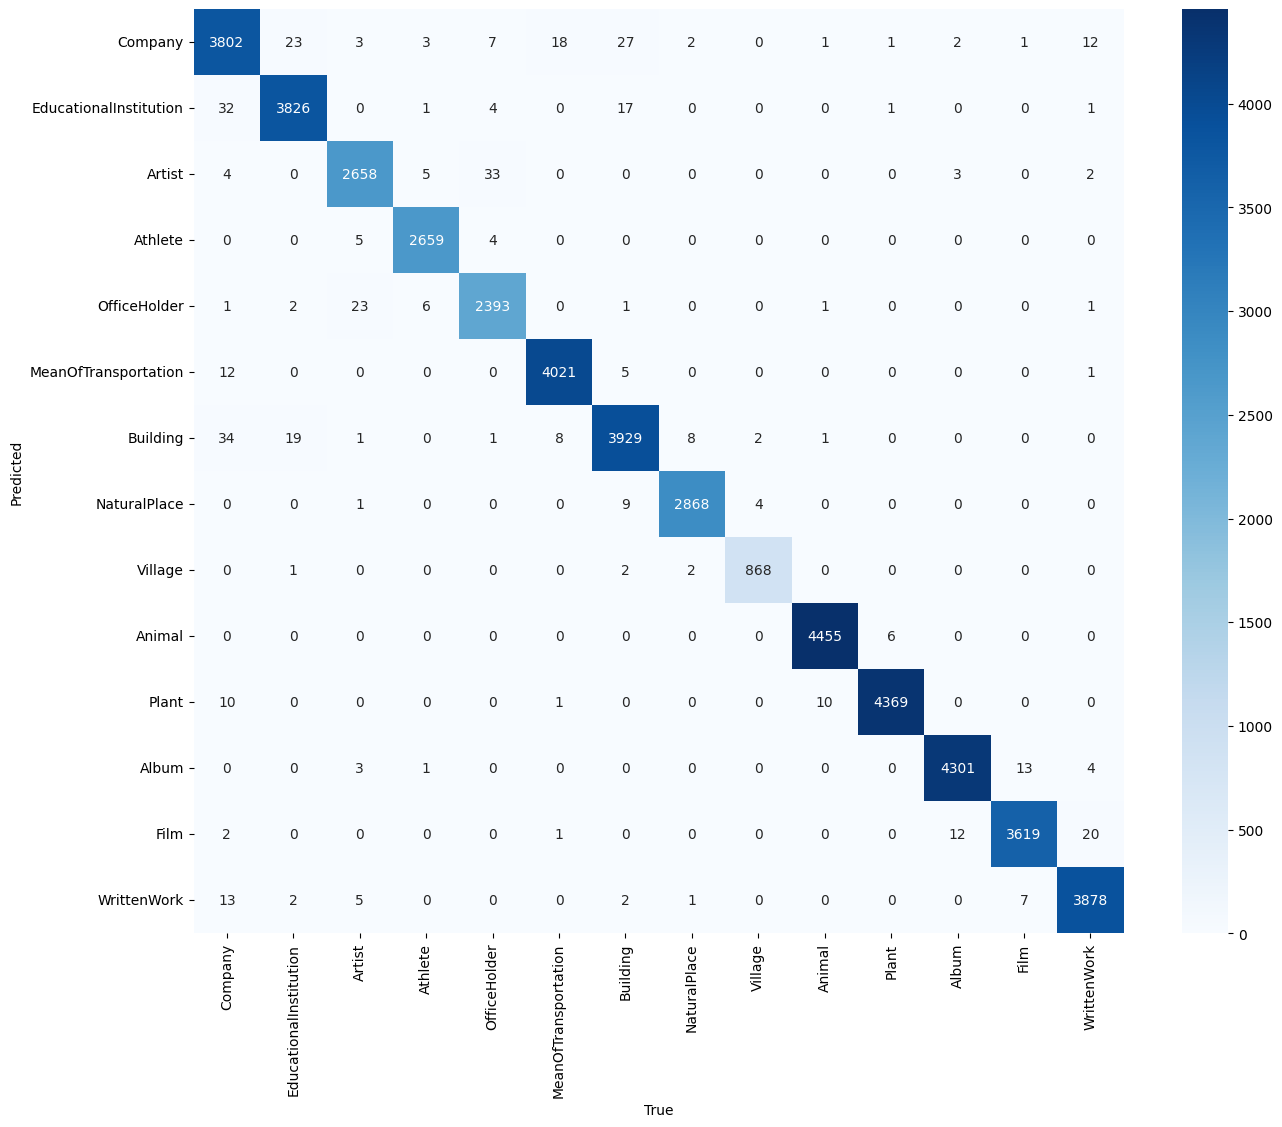

In [220]:
results_df = metrics_per_class(predictions, true_vals, label_names)

In [206]:
labels_flat = np.argmax(true_vals, axis=1)

In [207]:
unique_classes, counts = np.unique(labels_flat, return_counts=True)


In [208]:
percentages = (counts / len(labels_flat)) * 100


In [209]:
for i, label_name in enumerate(label_names):
    print(f"{label_name}: {percentages[i]:.2f}%")


Company: 8.11%
EducationalInstitution: 8.07%
Artist: 5.62%
Athlete: 5.54%
OfficeHolder: 5.05%
MeanOfTransportation: 8.39%
Building: 8.32%
NaturalPlace: 5.99%
Village: 1.81%
Animal: 9.27%
Plant: 9.12%
Album: 8.98%
Film: 7.59%
WrittenWork: 8.12%


In [205]:
results_df

Company  EducationalInstitution    Artist   Athlete  OfficeHolder  \
Accuracy   0.974372                0.985574  0.982625  0.996627      0.985585   
Precision  1.000000                1.000000  1.000000  1.000000      1.000000   
Recall     0.974372                0.985574  0.982625  0.996627      0.985585   
F1score    0.987020                0.992735  0.991236  0.998310      0.992740   

           MeanOfTransportation  Building  NaturalPlace   Village    Animal  \
Accuracy               0.995543  0.981514      0.995142  0.994273  0.998655   
Precision              1.000000  1.000000      1.000000  1.000000  1.000000   
Recall                 0.995543  0.981514      0.995142  0.994273  0.998655   
F1score                0.997767  0.990671      0.997565  0.997128  0.999327   

              Plant     Album      Film  WrittenWork  
Accuracy   0.995216  0.995141  0.990421     0.992323  
Precision  1.000000  1.000000  1.000000     1.000000  
Recall     0.995216  0.995141  0.990421     0.992323  
F1score    0.997602  0.997565  0.995188     0.996147

In [221]:
results_df.to_csv('data_volume/BERT_results.csv')

In [197]:
accuracy_per_class(predictions, true_vals)



Class: 0.0
Accuracy: 3802/3902

Class: 1.0
Accuracy: 3826/3882

Class: 2.0
Accuracy: 2658/2705

Class: 3.0
Accuracy: 2659/2668

Class: 4.0
Accuracy: 2393/2428

Class: 5.0
Accuracy: 4021/4039

Class: 6.0
Accuracy: 3929/4003

Class: 7.0
Accuracy: 2868/2882

Class: 8.0
Accuracy: 868/873

Class: 9.0
Accuracy: 4455/4461

Class: 10.0
Accuracy: 4369/4390

Class: 11.0
Accuracy: 4301/4322

Class: 12.0
Accuracy: 3619/3654

Class: 13.0
Accuracy: 3878/3908



## Error Analysis

In [223]:
max_vals = []
for vector in predictions:

    max_val = np.max(vector)
    max_index = np.where(vector == max_val)[0][0]
    max_vals.append(max_index)
    
data_test["pred"] = max_vals

In [224]:
data_test["correct_pred"] = data_test.apply(lambda row: True if row["pred"]==row["label"] else False, axis = 1)

In [231]:
data_test.to_csv('data_volume/test_errors_BERT.csv')

In [229]:
incorrect_predictions = data_test[data_test['correct_pred'] == False]


In [230]:
incorrect_predictions

label                                              title  \
36         0  Government of the Democratic Republic of the C...   
65         0                 Ranik Ultimate Fighting Federation   
69         0                                  Maine Chance Farm   
81         0                 Student Volunteer Campus Community   
190        0                             Joyland Amusement Park   
...      ...                                                ...   
47795     13                                       Pocket Gamer   
47797     13                 American Society of Church History   
47855     13                                    Doctor Who Live   
47909     13                        Callahan's Crosstime Saloon   
48028     13                                          IranDokht   

                                                 content  words_count  pred  \
36      The Government of the Democratic Republic of ...           46     4   
65      Ranik Ultimate Fighting Federation (RUFF) is ...           62     3   
69      Maine Chance Farm was an American Thoroughbre...           67     9   
81      Student Volunteer Campus Community (abbreviat...           35     1   
190     The Joyland Amusement Park is a small family-...           42     6   
...                                                  ...          ...   ...   
47795   Pocket Gamer is a video game website that foc...           66     0   
47797   The American Society of Church History (ASCH)...           66     0   
47855   Doctor Who Live: The Monsters Are Coming! is ...           20    12   
47909   In the fictional universe of Spider Robinson ...           70     6   
48028   IranDokht is an online media platform founded...           60     0   

       correct_pred  
36            False  
65            False  
69            False  
81            False  
190           False  
...             ...  
47795         False  
47797         False  
47855         False  
47909         False  
48028         False  

[471 rows x 6 columns]

## Bias

In [244]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [245]:
model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_2.model', map_location=torch.device('cuda')))

<All keys matched successfully>

In [255]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
words = ["man", "boy", "male", "woman", "girl", "female", "european", "caucasian", "african", "asian", 
"indian", "pakistani", "bangladeshi", "chinese", "caribbean", "gypsy", "arab"]
labels = [1 if i < len(words)//2 else 0 for i in range(len(words))]
inputs = tokenizer(words, padding=True, truncation=True, max_length=20, return_tensors='pt')
attention_mask = inputs['attention_mask']
input_ids = inputs['input_ids']
labels = torch.tensor(labels)

dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(input_ids, attention_mask, labels), batch_size=batch_size)
loss, predictions_words, true_vals = evaluate(dataloader)

In [256]:
bias_results = pd.DataFrame(predictions_words, columns=label_names)
bias_results.index = words
bias_results

Company  EducationalInstitution    Artist   Athlete  \
man         -4.333322               -3.597023 -3.364857 -3.711730   
boy         -4.640215               -2.791195 -2.639102 -3.244845   
male        -5.137737               -4.714097 -4.698801 -4.473209   
woman       -4.161922               -2.439126 -2.768520 -3.104411   
girl        -5.216488               -2.824867 -3.574240 -3.542331   
female      -4.881694               -4.230158 -4.263146 -3.944008   
european    -4.106402               -3.948745 -4.916870 -5.117980   
caucasian   -3.987833               -1.383443 -1.163367 -2.879517   
african     -4.509037               -3.977926 -3.655960 -4.807353   
asian       -4.779924               -3.676374 -4.439650 -5.372636   
indian      -4.614927               -4.006137 -4.328153 -5.314953   
pakistani   -5.447309               -3.097117 -2.576384 -3.843233   
bangladeshi -4.372900               -2.603950 -3.248363 -4.576473   
chinese     -4.847479               -3.295406 -4.356450 -4.765728   
caribbean   -4.821178               -4.760031 -4.854085 -4.469917   
gypsy       -4.811406               -4.523052 -4.004934 -5.038785   
arab        -3.961894               -2.890301 -3.402539 -3.726621   

             OfficeHolder  MeanOfTransportation  Building  NaturalPlace  \
man             -4.333508             -4.093316 -4.586336     -5.054307   
boy             -3.950088             -3.534320 -4.403486     -4.444491   
male            -4.700990             -4.623969 -5.319813     -4.934660   
woman           -2.969654             -3.609807 -4.092204     -4.446847   
girl            -4.687187             -4.404801 -5.114210     -5.389494   
female          -4.100175             -4.054778 -4.869246     -4.508557   
european        -4.956898             -5.127161 -5.213395     -5.560829   
caucasian       -2.158469             -3.377378 -2.999831     -3.499325   
african         -4.926777             -4.643692 -5.014544     -5.184457   
asian           -5.475856             -5.110942 -5.325567     -5.190349   
indian          -5.340534             -5.055562 -5.091043     -5.131793   
pakistani       -3.665439             -5.001787 -4.895407     -5.510195   
bangladeshi     -4.279217             -4.782371 -4.148557     -5.013770   
chinese         -4.934341             -5.058974 -4.827617     -5.307124   
caribbean       -5.110014             -4.679738 -5.181115     -4.991918   
gypsy           -5.678533             -4.390121 -4.992361     -5.675391   
arab            -4.276464             -3.827770 -3.654074     -4.487677   

              Village    Animal     Plant     Album      Film  WrittenWork  
man         -4.814567 -4.751137 -3.364946 -3.321927 -3.981220    -1.374318  
boy         -4.222125 -4.440500 -3.201125 -3.958873 -3.861678    -1.253760  
male        -5.502540  0.141032 -2.607226 -5.376399 -4.850915    -3.554900  
woman       -4.634216 -4.450020 -2.774932 -3.525754 -3.539717    -1.428960  
girl        -5.397825 -5.208951 -4.154040 -3.815291 -4.334269    -2.292739  
female      -5.210115  0.798107 -2.389434 -5.349030 -4.037205    -3.161568  
european    -5.310150 -5.288696 -5.075144 -4.675962 -5.526434    -3.789830  
caucasian   -3.927954 -4.306753 -1.580119 -4.312832 -2.939128    -1.842735  
african     -5.128941 -4.602705 -3.771111 -4.674315 -5.251379    -2.719757  
asian       -5.872109 -5.343911 -4.134941 -4.829656 -5.144059    -2.493583  
indian      -5.360398 -5.175740 -4.230214 -5.194376 -5.426752    -3.155296  
pakistani   -5.655239 -5.470486 -4.245134 -5.604469 -4.907464    -3.911598  
bangladeshi -4.679240 -5.154950 -3.785199 -4.985329 -5.185870    -3.151198  
chinese     -5.060643 -5.001176 -3.520545 -5.332547 -5.264312    -2.792494  
caribbean   -5.134592 -4.179116 -4.569389 -5.142381 -5.704178    -4.032531  
gypsy       -4.984414 -4.841130 -4.681792 -3.300990 -5.701767    -3.180122  
arab        -4.230721 -4.427704 -2.930680 -4.514690 -4.057690    -1.502370

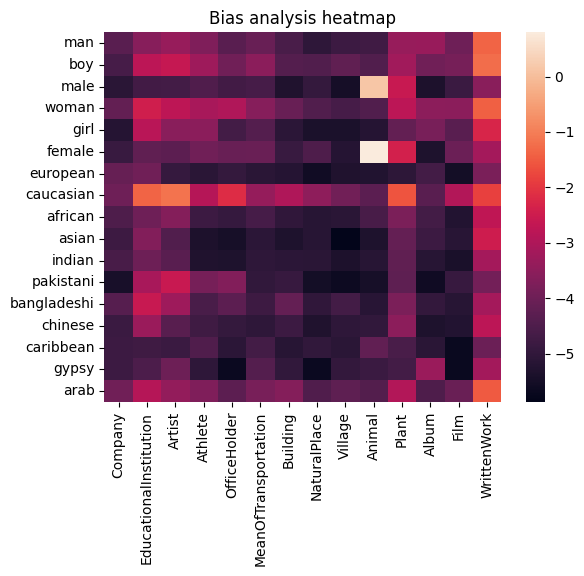

In [259]:
sns.heatmap(bias_results)
plt.title('Bias analysis heatmap')
plt.savefig("data_volume/biass_heatmap_bert.png")